In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">02. 딥러닝입문_분류분석</font></b>

In [8]:
from tensorflow.keras.utils import to_categorical # 분류분석 시 One-Hot-Encoding(추천!)
import pandas as pd # One-Hot-Encoding (pandas는 비추!)
from tensorflow.keras.models import Sequential, save_model, load_model # 모델 생성 및 load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용 분야 : 글자 인식, 문장 분류, 예측, 질병 진단, 안면 인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * 분류분석(타겟변수가 category 변수인 분석. 다중분류 vs 이진분류)
    * 비지도학습(입력변수)
        * 군집화
    * 강화학습
- 지도학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련 데이터(학습 데이터셋), 검증 데이터셋, 시험 데이터셋, One-Hot-Encoding
    - 3. 모델 구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(훈련, 검증 데이터셋)
    - 6. 모델 평가하기(시험 데이터셋)
    - 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [11]:
# 학습 데이터 = 훈련 데이터셋
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9] * 10)
y_train = np.array([2, 4, 6, 8,10,12,14,16,18] * 10)
# 검증 데이터셋, 시험 데이터셋
x_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val = np.array([2, 4, 6, 8,10,12,14,16,18])

In [16]:
# Encoding 종류
    # 1. label encoding(데이터가 숫자가 아닌 문자일 때)
    # 2. one-hot-encoding(회귀분석이 아닌 분류분석을 위해 필요)): 분류분석을 위한 타겟변수는 무조건 반드시 이 코딩을 해줘야 함)
    #    값의 개수만큼 열을 만들고 해당 범주에 해당하는 열에만 1, 나머지는 0
data = np.array(['a','b','c','b','b'])
print('원래 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('label encoding된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('one-hot-encoding된 데이터 :\n', one_hot_encoding_data) 

원래 데이터 : ['a' 'b' 'c' 'b' 'b']
label encoding된 데이터 : [0 1 2 1 1]
one-hot-encoding된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
# pandas 이용한 one-hot-encoding 
data = np.array([1, 4, 5, 4, 5])
categorical_onehot = to_categorical(data) # 원핫인코딩 결과 : 넘파이 배열 
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩 결과 : 데이터 프레임
print('get_dummies 이용 \n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용 
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [24]:
# 분류분석을 위한 타겟변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)

In [27]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델 구성

In [29]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid'))
# 활성화 함수 : tanh(이미지 처리), elu, relu, sigmoid(이진분류), softmax(출력층에서 사용)
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습 과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중 분류분석에서의 loss : categorical_crossentropy
<img src="https://velog.velcdn.com/images%2Fwoooa%2Fpost%2F81461be3-3e94-4cc8-bd83-9277836ea50d%2Fimage.png" width="500">

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [31]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                validation_data=(x_val, Y_val), verbose=2)
# verbose=0 : 출력 X, verbose=1 : 기본값 출력,  verbose=2 : epoch별 자세한 log 출력

Epoch 1/300
9/9 - 1s - loss: 2.8192 - accuracy: 0.0111 - val_loss: 2.6007 - val_accuracy: 0.1111 - 545ms/epoch - 61ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5074 - accuracy: 0.1111 - val_loss: 2.4056 - val_accuracy: 0.1111 - 33ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3552 - accuracy: 0.1111 - val_loss: 2.2825 - val_accuracy: 0.2222 - 32ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2571 - accuracy: 0.1222 - val_loss: 2.1928 - val_accuracy: 0.4444 - 33ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1736 - accuracy: 0.4000 - val_loss: 2.1258 - val_accuracy: 0.3333 - 33ms/epoch - 4ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1141 - accuracy: 0.2333 - val_loss: 2.0699 - val_accuracy: 0.3333 - 31ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0544 - accuracy: 0.3333 - val_loss: 2.0107 - val_accuracy: 0.3333 - 34ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9957 - accuracy: 0.3000 - val_loss: 1.9520 - val_accuracy: 0.2222 - 32ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.2819 - accuracy: 1.0000 - val_loss: 0.2693 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.2713 - accuracy: 1.0000 - val_loss: 0.2604 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.2547 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.2521 - accuracy: 1.0000 - val_loss: 0.2399 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.2398 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.2326 - accuracy: 1.0000 - val_loss: 0.2230 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2254 - accuracy: 1.0000 - val_loss: 0.2180 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2165 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
import matplotlib.pyplot as plt

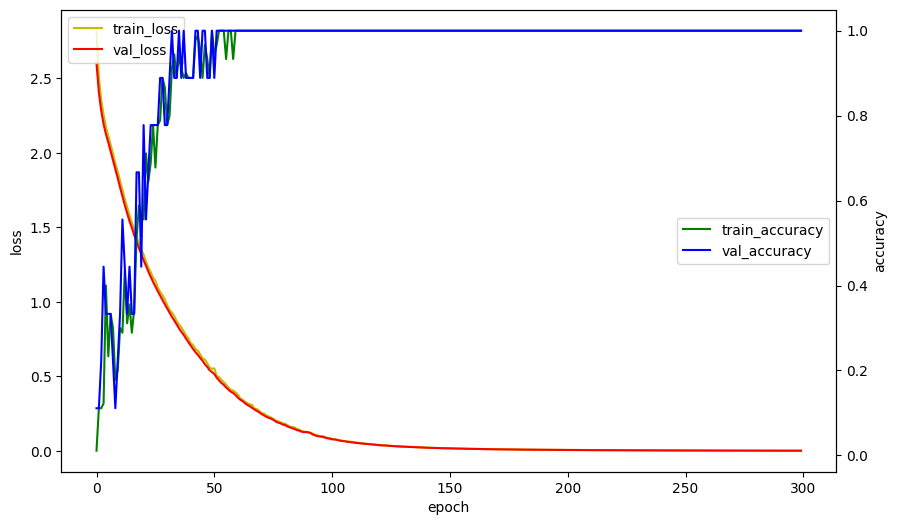

In [40]:
# 학습 과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history.get('loss'), 'y', label='train_loss')
loss_ax.plot(hist.history.get('val_loss'), 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax축과 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history.get('accuracy'), 'g', label='train_accuracy')
acc_ax.plot(hist.history.get('val_accuracy'), 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [44]:
# 모델 평가하기(테스트 데이터셋으로 모델 학습 설정 과정의 loss, metrics 평가)
score = model.evaluate(x_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000


In [47]:
print('loss :', score[0])
print('accuracy :', score[1])

loss : 0.0019593227189034224
accuracy : 1.0


# 7. 모델 사용하고 (모델을 이용해서 예측하기) 저장하기

In [53]:
H = model.predict(np.array([2]))
H

1/1 [==============================] - 0s 15ms/step


array([[2.7005975e-26, 3.8846116e-30, 5.3752668e-04, 3.6977441e-28,
        9.9894565e-01, 2.5010246e-22, 5.1681412e-04, 2.0010049e-33,
        1.1376969e-10, 1.4440543e-26, 2.0946754e-08, 4.7974409e-15,
        7.8325892e-32, 1.7128038e-26, 0.0000000e+00, 1.8480183e-24,
        0.0000000e+00, 3.1605220e-12, 0.0000000e+00]], dtype=float32)

In [54]:
H.argmax()

4

In [56]:
# 몇 %의 확률로 4라고 예측했니?
H[0, H.argmax()] * 100

99.89456534385681

In [57]:
# 2, 4, 6 의 확률
H[0, [2, 4, 6]]

array([5.3752668e-04, 9.9894565e-01, 5.1681412e-04], dtype=float32)

In [58]:
model.save('model/02_deep.h5')

In [59]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [62]:
model1.predict(np.array([3])).argmax()

1/1 [==============================] - 0s 15ms/step


6